In [27]:
#!pip install pandas-datareader

In [28]:
import pandas_datareader.data as pdr
import pandas as pd
from datetime import date, timedelta, datetime

end = date.today()
start = datetime(year=end.year, month=end.month-1, day=end.day)

print(f'Period 1 month until today: {start} to {end} ')

Period 1 month until today: 2023-06-17 00:00:00 to 2023-07-17 


In [30]:
spx_index = pdr.get_data_stooq('^SPX', start, end)
spx_index.index
import pandas as pd

date_strings = ['2023-07-17', '2023-07-16', '2023-07-15', '2023-07-14', '2023-07-13', '2023-07-10', '2023-07-09', '2023-07-08', '2023-07-07', '2023-07-06', '2023-07-02', '2023-07-01', '2023-06-30', '2023-06-29', '2023-06-26', '2023-06-25', '2023-06-24', '2023-06-23', '2023-06-22', '2023-06-21', '2023-06-20']

date_index = pd.DatetimeIndex(date_strings)

print(date_index)


DatetimeIndex(['2023-07-17', '2023-07-16', '2023-07-15', '2023-07-14',
               '2023-07-13', '2023-07-10', '2023-07-09', '2023-07-08',
               '2023-07-07', '2023-07-06', '2023-07-02', '2023-07-01',
               '2023-06-30', '2023-06-29', '2023-06-26', '2023-06-25',
               '2023-06-24', '2023-06-23', '2023-06-22', '2023-06-21',
               '2023-06-20'],
              dtype='datetime64[ns]', freq=None)


<AxesSubplot:title={'center':'1 month price history for index S&P500 Index'}, xlabel='Date'>

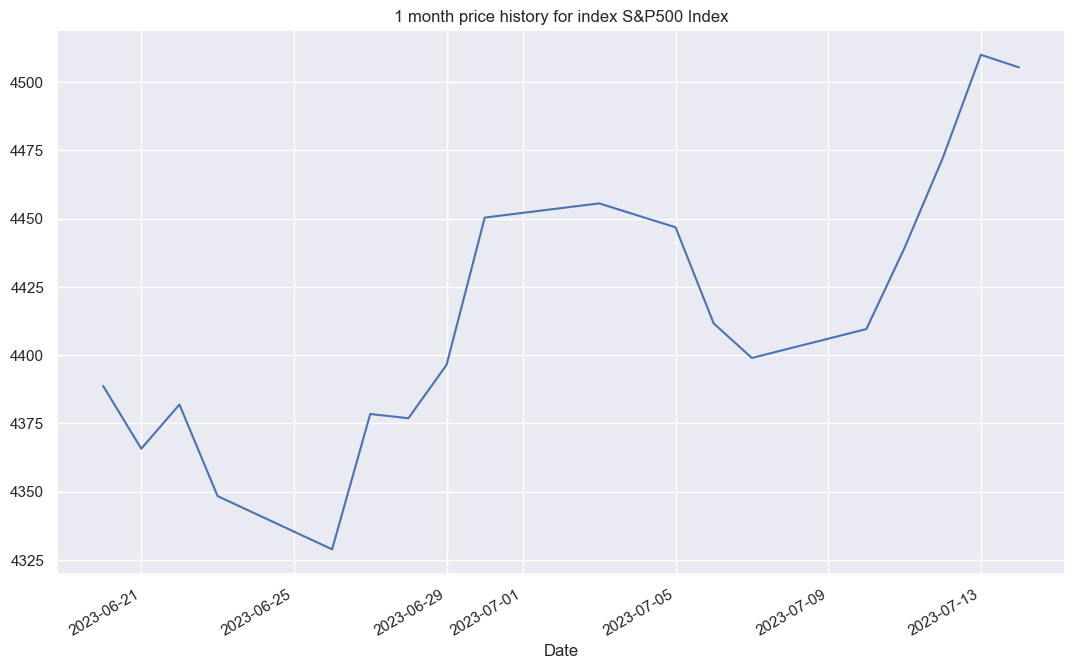

In [31]:
spx_index['Close'].plot(title='1 month price history for index S&P500 Index')

In [32]:

import sys
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#nltk.download('vader_lexicon')

pd.set_option('display.max_colwidth',1000)

SIA = SentimentIntensityAnalyzer()

def get_articles_sentiments(keywrd, startd, sources_list=None, show_all_articles=False):
    newsapi = NewsApiClient(api_key='api_key')

    if type(startd) == str:
        my_date = datetime.strptime(startd, '%d-%b-%Y')
    else:
        my_date = startd

    if sources_list:
        articles = newsapi.get_everything(
            q=keywrd, from_param=my_date.isoformat(), to=(my_date + timedelta(days=30)).isoformat(),
            language="en", sources=",".join(sources_list), sort_by="relevancy", page_size=100
        )
    else:
        articles = newsapi.get_everything(
            q=keywrd, from_param=my_date.isoformat(), to=(my_date + timedelta(days=30)).isoformat(),
            language="en", sort_by="relevancy", page_size=100
        )

    article_content = ''
    date_sentiments = {}
    date_sentiments_list = []
    seen = set()

    for article in articles['articles']:
        if str(article['title']) in seen:
            continue
        else:
            seen.add(str(article['title']))

        article_content = str(article['title']) + '. ' + str(article['description'])
        sentiment = SIA.polarity_scores(article_content)['compound']

        date_sentiments.setdefault(my_date, []).append(sentiment)
        date_sentiments_list.append((sentiment, article['url'], article['title'], article['description']))

    date_sentiments_l = sorted(date_sentiments_list, key=lambda tup: tup[0], reverse=True)
    sent_list = list(date_sentiments.values())[0]

    return pd.DataFrame(date_sentiments_list, columns=['Sentiment', 'URL', 'Title', 'Description'])

# Retrieves a list of news sources based on the specified category.
def get_sources(category = None):
  newsapi = NewsApiClient(api_key='api_key')
  sources = newsapi.get_sources()
  
  if category is not None:
    result = [source['id'] for source in sources['sources'] if source['category'] == category and source['language'] == 'en']
  else:
    result = [source['id'] for source in sources['sources'] if source['language'] == 'en']
  
  return result

len(get_sources())  

81

In [33]:
#FREE NewsAPI allows to retrieve only 1 month of news data

end_date = date.today()
start_date = date(year=end.year, month=end.month-1, day=end.day)

print('Start day = ', start_date)
print('End day = ', end_date)

current_day = start_date
business_sources = get_sources('business')
sentiment_all_score = []
sentiment_business_score = []

dates=[]

while current_day <= end_date:
  dates.append(current_day)
  sentiments_all = get_articles_sentiments(keywrd= 'stock' ,
startd = current_day, sources_list = None, show_all_articles= True)
  sentiment_all_score.append(sentiments_all.mean())
  sentiments_business = get_articles_sentiments(keywrd= 'stock' , startd = current_day, sources_list = business_sources, show_all_articles= True)
  sentiment_business_score.append(sentiments_business.mean())
  
  current_day = current_day + timedelta(days=1)

Start day =  2023-06-17
End day =  2023-07-17


/var/folders/h9/brqpqy9x10q4n_n6230q8s800000gn/T/ipykernel_50899/1374914329.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sentiment_all_score.append(sentiments_all.mean())
/var/folders/h9/brqpqy9x10q4n_n6230q8s800000gn/T/ipykernel_50899/1374914329.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sentiment_business_score.append(sentiments_business.mean())
/var/folders/h9/brqpqy9x10q4n_n6230q8s800000gn/T/ipykernel_50899/1374914329.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduct

NewsAPIException: {'status': 'error', 'code': 'rateLimited', 'message': 'You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.'}

In [22]:
sentiments = pd.DataFrame([dates,np.array(sentiment_all_score),np.array(sentiment_business_score)]).transpose()

sentiments.columns =['Date','All_sources_sentiment','Business_sources_sentiment']

sentiments['Date'] = pd.to_datetime(sentiments['Date'])

sentiments['All_sources_sentiment'] = sentiments['All_sources_sentiment'].astype(float)
sentiments['Business_sources_sentiment'] = sentiments['Business_sources_sentiment'].astype(float)

In [23]:
sentiments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        31 non-null     datetime64[ns]
 1   All_sources_sentiment       30 non-null     float64       
 2   Business_sources_sentiment  30 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 872.0 bytes


In [24]:
sentiments.set_index("Date", inplace=True)

sentiments.head()

,All_sources_sentiment,Business_sources_sentiment
Date,,
2023-06-17,0.174749,0.219212
2023-06-18,0.174749,0.219212
2023-06-19,0.188711,0.211439
2023-06-20,0.197999,0.214997
2023-06-21,0.187698,0.222864


In [25]:
sentiments_vs_snp = sentiments.join(spx_index['Close']).dropna()
sentiments_vs_snp.rename(columns={'Close':'s&p500_close'}, inplace=True)
sentiments_vs_snp.head()

,All_sources_sentiment,Business_sources_sentiment,s&p500_close
Date,,,
2023-06-20,0.197999,0.214997,4388.71
2023-06-21,0.187698,0.222864,4365.69
2023-06-22,0.185104,0.212242,4381.89
2023-06-23,0.200900,0.221381,4348.33
2023-06-26,0.228615,0.233747,4328.82


<AxesSubplot:xlabel='Date', ylabel='Business_sources_sentiment'>

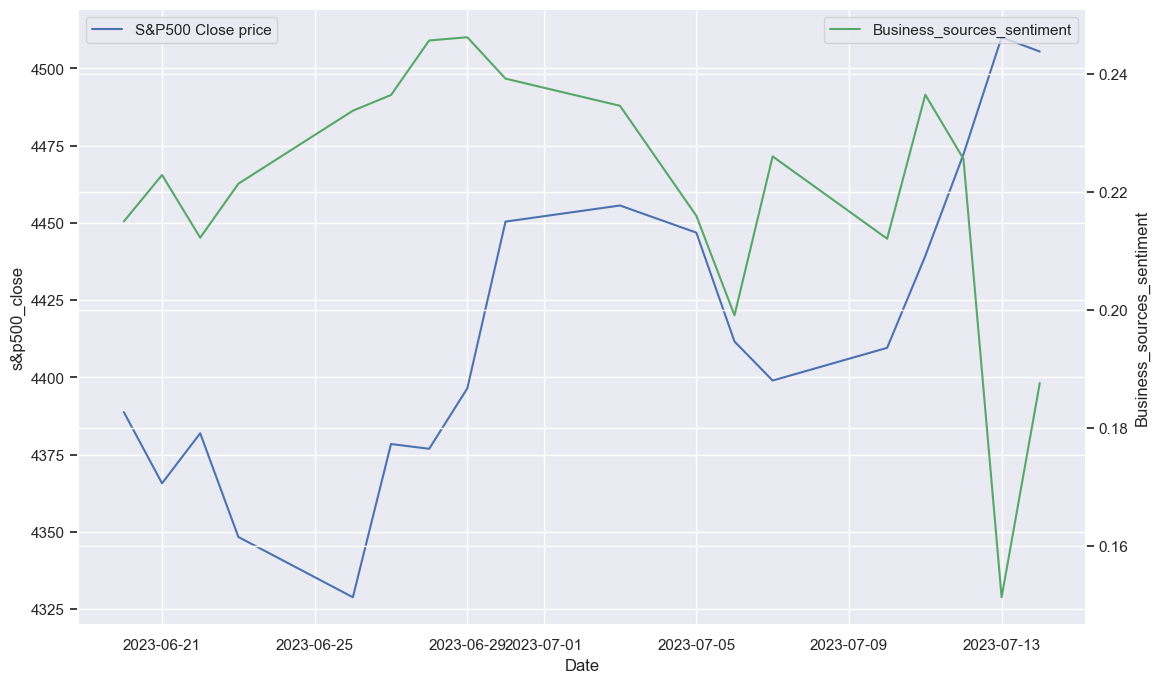

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(13.0,8.0)})
ax=sns.lineplot(data=sentiments_vs_snp['s&p500_close'], color="b", label='S&P500 Close price')
ax2 = plt.twinx()
sns.lineplot(data=sentiments_vs_snp["Business_sources_sentiment"], color="g", ax=ax2, label='Business_sources_sentiment')